In [1]:
import tensorflow as tf
import numpy as np
import sys

In [3]:
import os
import inspect 
import keras as k
from keras import backend

In [4]:
tf.__version__ , k.__version__

('2.0.0', '2.3.1')

In [5]:
print(sys.version)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


Quick TF example 

In [10]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
print(a)#Tensor("Placeholder:0", dtype=float32)
add1 = tf.add(a,b)
print(add1)#Tensor("Add_1:0", dtype=float32)
sess = tf.Session()
print(sess)#<tensorflow.python.client.session.Session object at 0x0000028EC8104198>
dict_map = {a : 3.5, b : 34.1} #names in the feed dict have to match the placeholder names,'ve to exactly the same,they are actual params
c = sess.run(add1, feed_dict = dict_map)
print(c)#37.6

Tensor("Placeholder:0", dtype=float32)
Tensor("Add:0", dtype=float32)
37.6


In [11]:
print(os.path.dirname(inspect.getfile(tf)))# where Tf is installed in your system

C:\Users\sai_chedemala\AppData\Local\Continuum\Anaconda3\lib\site-packages\tensorflow


In [407]:
print(os.path.dirname(inspect.getfile(k)))# where Tf is installed in your system

C:\Users\sai_chedemala\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras


In [365]:
print(k.backend._BACKEND)

tensorflow



PUCOSITORE

TF Flow : 
    1. Define placeholders and required variables. Define your graph comuptation operation using phs and vars. 
    2. Initialize all varialbles
    3. Define a dictionary mapping phs with actual data to be passed
    4. Define session and run session
    

In [13]:
# Over all Definition of your graph computation
#1.***********Define your plcae holders computation*********
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
#2. Define any variables if needed
x = tf.Variable(77)
#3.***********Define your graph computation*********
add1 = tf.add(a,b)
#***********  graph defnition complete*********

#*** initialize***
init = tf.global_variables_initializer()# for variables 


#**** Values to be passed to placeolders as dict ( dict mapping phs with values)*******
dict_map = {a : 10.5, b : 34.1}

#******define and run session- 1st way****
sess = tf.Session()
sess.run(init)
c = sess.run(add1, feed_dict = dict_map)

#******define and run session- 2nd way****
with tf.Session() as sess:
    init.run()
    c = add1.eval(feed_dict = dict_map)
    

<font color='blue'> OutputLayer : </font>
    1. Regression : Single neuron
    2. Binary Classification : Single Neuron
    3. Multi Class Classification : Multiple Neurons with Softmax

<font color='blue'> Data Pre-Processing</font>:<br>


1. One hot encode the i/p and o/p if needed<br>
2. Rescale input to range 0,1 (normalize) (mostly for images?)<br>
3. Or try to Standardize (mu = 0 , sd =1)<br>
4. There are some problems with normalizing which should be adjusted for...what are they? Check Andrew NG.<br>
<br>

<font color='blue'>Batch GD:</font><br>

Derivative of Cost is considered( summation of loss divided by training set size i.e all samples m)<br>
Note : Loss/Cost function provides an eqn/method that calculates the diff between predicted and actual.
Optimizer is the method used to decide how to update the weights.

<font color='blue'>Stochastic GD :</font><br>

1. Instead of computing Loss and Gradient on all training samples, just calculate the loss&derivative of the loss on a very        small random sub-sample(1 to 100,1000) and just act or pretnd that you have the loss for all of the training samples.
   Literally and technically SGD is for 1 training sample, i.e literally update weights after each training sample.But minibatch    is good, its a good middle ground between using all data and using only one sample.<br>
1. Each step is very cheap to compute,but you pay by having and dealing with a horrible estimate of the real loss.<br> 
1. You can only compensate by doin this many many times.<br>
1. This seems to be the only "fast" way of doing GD while paying for dealing with a bad estimate of the actual loss at each        step. <br>
1. Usefull when there is redundancy in the data (can ebe checked by clusters and cluster sizes).<br>
1. SGD has to and has to be radom.<br>
<br>

<font color='blue'>Epoch :</font>

1. One Round of using all your training data for updating weigts is called Epoch.

<font color='blue'>Updating Weights:</font>

1. Weights can be updated from loss calculated after each training example(like above SGD) . (online Learning)
1. Weights can be updated from loss calculated for all training examples after summing and averaging up loss from each training example.(Batch Learning => all examples)
1. Weights can be updated from loss calculated for mini bacth training examples after summing and averaging up loss from each training example(like above SGD).

    1. <font color='blue'>Alpha/Learning Rate/Step Size</font>
        1. Multiplication Fator of learning rate(step size) is used with derivative of the loss to adjust/nudge the weights
        1. Alpha = .1 or .01 or .005 (tv) (Typical values)
    1. <font color='blue'>Learning Rate Decay</font>
        1. Used to reduce alpha as #of epochs increase. Thus larger changes(steps) to weights initially and smaller finer as                epochs progress.
    1. <font color='blue'>Momentum :</font>
        1. For faster convergence and reduced osicaltions. Use weights from previous time step * gamma. (.9 etc)(tv)

<font color='blue'> Predictions :</font><br>
Once trained, save netwrok architechture(topology) and weights and use for predictions. Pass test data as input and with a forward pass get predicted o/p.

 - https://adventuresinmachinelearning.com/stochastic-gradient-descent/
 - http://ruder.io/optimizing-gradient-descent/

# Basic TF Model program

1. Create Placeholders
1. Create Tensors (variables) that are not yet executed/evaluated.
1. Write operations between those Tensors. (part of defining your computation graph)
1. Write final operation that uses variables from all above operations.(part of defining your computation graph)


1. Initialize your Tensors.
1. Create a Session.
1. Run the Session with the final operation. Pass placeholder values in feed_dict.
   This will run the operations you'd written above.


# Basic Keras Model
DCFE    
1. Define Model (topology)
1. Compile Model
1. Fit Model
1. Evaluate Model
1. Predict

<font color='blue'>Define</font> Model/Netwrok Topology

In [6]:
def l1_reg(weight_matrix):
    return 0.01 * np.sum(np.abs(weight_matrix))


In [10]:
X = np.array([[1,2,3,4,5,6,7,8],
              [1,2,3,4,5,6,7,9],
             [1,2,3,4,5,6,7,10],
             [1,2,3,4,5,6,7,11],
             [1,2,3,4,5,6,7,12],
             [1,2,3,4,5,6,7,13],
             [1,2,3,4,5,6,7,14],
             [1,2,3,4,5,6,7,15],
             [1,2,3,4,5,6,7,16],
             [1,2,3,4,5,6,7,17],
             [1,2,3,4,5,6,7,18],
             [1,2,3,4,5,6,7,19],
             [1,2,3,4,5,6,7,20],
             [1,2,3,4,5,6,7,21],
             [1,2,3,4,5,6,7,22],
             [1,2,3,4,5,6,7,23],
             [1,2,3,4,5,6,7,24],
             [1,2,3,4,5,6,7,25],
             [1,2,3,4,5,6,7,26],
             [1,2,3,4,5,6,7,27],
             [1,2,3,4,5,6,7,28],
             [1,2,3,4,5,6,7,29],
             [1,2,3,4,5,6,7,30],
             [1,2,3,4,5,6,7,31],
             [1,2,3,4,5,6,7,32],
             [1,2,3,4,5,6,7,33],
             [1,2,3,4,5,6,7,34],
             [1,2,3,4,5,6,7,35],
             [1,2,3,4,5,6,7,36],
             [1,2,3,4,5,6,7,37],
             [1,2,3,4,5,6,7,38],
             [1,2,3,4,5,6,7,39],
             [1,2,3,4,5,6,7,30],
             [1,2,3,4,5,6,7,31],
             [1,2,3,4,5,6,7,32],
             [1,2,3,4,5,6,7,33],
             [1,2,3,4,5,6,7,34],
             [1,2,3,4,5,6,7,35],
             [1,2,3,4,5,6,7,36],
             [1,2,3,4,5,6,7,37],
             [1,2,3,4,5,6,7,38],
             [1,2,3,4,5,6,7,39],
             [1,2,3,4,5,6,7,40],
             [1,2,3,4,5,6,7,41],
             [21,2,3,4,5,6,7,41],
             [31,2,3,4,5,6,7,41],
             [41,2,3,4,5,6,7,41],
             [51,2,3,4,5,6,7,41],
             [61,2,3,4,5,6,7,41],
             [71,2,3,4,5,6,7,41],
             [81,2,3,4,5,6,7,41],
             [91,2,3,4,5,6,7,41],
             [101,12,3,4,5,6,7,41],
             [111,22,3,4,5,6,7,41],
          ])

Y = np.sum(X, keepdims = True, axis = 1)
print(X.shape,Y.shape)

(54, 8) (54, 1)


In [12]:
X.shape, Y.shape

((54, 8), (54, 1))

In [124]:
from keras.models import Sequential 
from keras.layers import Dense
#*********************
model = Sequential()
#X.shape is 54x8 (54 samples, 8 features)
#Input layer--> input_dim = 8 specified in 1st hidden layer implies that there are 8 neurons in input layer.
#Input layer is implicitly defined by input_dim = 8 in 1st hidden layer in Keras                   
#If by convention # of neurons in input layer = number of features per row in trainig data then,
#always 1st layer's Weight dimension in Keras will be a square matrix of shape "features of i/p training data".
#model.add(Dense(32, input_dim = 8, activation = 'elu'))          #32x8  + 32   # 32 neurons in 1st hidden layer. I/p to 1st hidden layer is 8,Output is 32. W.shape = 32x8 
model.add(Dense(32, input_shape = (8,), activation = 'elu'))       #32x8  + 32   # 32 neurons in 1st hidden layer.
model.add(Dense(18, activation='elu' ))                           #18x32 + 18   # 18 neurons in 2nd hidden layer, I/p to 1st hidden layer is not specified, its automatically assumed from o/p of prev layer.W.shape = 18x32
model.add(Dense(12, activation='elu'))                            #12x18 + 12   # 12 neurons in 3rd hidden layer
model.add(Dense(8, activation='elu'))                             #8x12  +  8   # 8 neurons  in 4th hidden layer
model.add(Dense(6, activation='elu'))                             #6x8   +  6   # 6 neurons  in 5th hidden layer
model.add(Dense(1, activation='elu'))                             #1x6   +  1   # 1 neuron   in the last o/p layer

#So in General
#model.add( Dense(# of nuerons in current layer, input_dim = # of neurons in i/p layer(only on 1st layer), init = 'initalization method', activation = 'af'))

Lets us say input X has m rows and n features.
1. Then 1st input layer's shape of W (weight matrix) will be (# of nodes in 1st layer,n)--> You have to have a w per feature, so w1 to wn will be first row of weight matrix. If you have more nodes, such rows will repeat. And will repeat as many times as there are number of nodes in the i/p layer.Note that all features of X are passed to all nodes in 1st layer(fc)
2. The  1st hidden layer's shape of W will be (#of nodes in current layer, number of nodes in prev. layer)
3. Generic form : Shape of Weight matrix in layer L will be (nL x n L-1) wh. n is number of neurons in current layer.


The above way of defining your ANN works for both Regression and Classification problems. Only for classification you use
sigmoid or softmax activation function depending binary/multi class classification. And for regression you use no activation 
if its a free range numerical value to be predicted and sigmoid if the value is between 0-1.

In [126]:
print(model.summary())

#ValueError: Dimensions must be equal, but are 32 and 18 for 'loss_29/add_1' (op: 'Add') with input shapes: [32,18], [18,12].


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_8 (Dense)              (None, 18)                594       
_________________________________________________________________
dense_9 (Dense)              (None, 12)                228       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 7         
Total params: 1,275
Trainable params: 1,275
Non-trainable params: 0
____________________________________________________

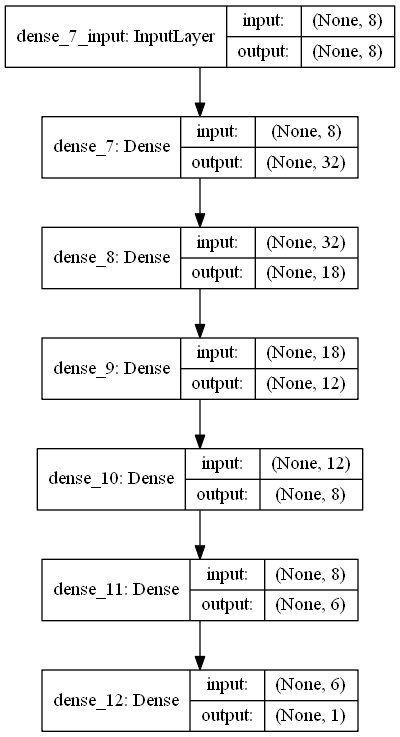

In [127]:
from keras.utils.vis_utils import plot_model
import pydotplus
import pydot
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


# Keep getting graphviz error eventhough,i installed Graphviz and added its bin path to PATH(os.path)

<font color='blue'>Compile</font> the above defined model

In [128]:
opt = k.optimizers.adam(lr=0.001, beta_1=0.9)

In [129]:
model.compile(loss = 'mae' , optimizer = opt, metrics = ['accuracy'])

<font color='blue'>Fit</font> the compiled model with training data (train)

In [130]:
history = model.fit( X,Y,  epochs = 35)

Epoch 1/35
54/54 [==============================] - 0s 2ms/step - loss: 70.0499 - accuracy: 0.0000e+00
Epoch 2/35
54/54 [==============================] - 0s 55us/step - loss: 69.6337 - accuracy: 0.0000e+00
Epoch 3/35
54/54 [==============================] - 0s 55us/step - loss: 69.0241 - accuracy: 0.0000e+00
Epoch 4/35
54/54 [==============================] - 0s 74us/step - loss: 68.3837 - accuracy: 0.0000e+00
Epoch 5/35
54/54 [==============================] - 0s 74us/step - loss: 67.8716 - accuracy: 0.0000e+00
Epoch 6/35
54/54 [==============================] - 0s 74us/step - loss: 67.4211 - accuracy: 0.0000e+00
Epoch 7/35
54/54 [==============================] - 0s 92us/step - loss: 66.9800 - accuracy: 0.0000e+00
Epoch 8/35
54/54 [==============================] - 0s 111us/step - loss: 66.5620 - accuracy: 0.0000e+00
Epoch 9/35
54/54 [==============================] - 0s 74us/step - loss: 66.1449 - accuracy: 0.0000e+00
Epoch 10/35
54/54 [==============================] - 0s 74us/ste

In [165]:
history.history

{'loss': [70.04988917598018,
  69.6337090951425,
  69.02411326655636,
  68.38366303620515,
  67.87163487187138,
  67.42113551387081,
  66.97997962103949,
  66.56204817030165,
  66.14490791603372,
  65.73490425392434,
  65.30769828513816,
  64.86686593514902,
  64.39816510235822,
  63.89978959825304,
  63.40739271375868,
  62.854986120153356,
  62.25929020069264,
  61.59289663809317,
  60.87696640579789,
  60.06263323183413,
  59.19339370727539,
  58.190390834101926,
  57.06336805555556,
  55.788614908854164,
  54.36929914686415,
  52.73110848885995,
  50.91002005117911,
  48.800680796305336,
  46.5062387254503,
  44.100766782407405,
  41.310998422128186,
  38.425291767826785,
  35.218850171124494,
  31.85595851474338,
  28.023715125189888],
 'accuracy': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

<font color='blue'>Evaluate</font> the model

In [131]:
scores = model.evaluate(X,Y)

54/54 [==============================] - 0s 314us/step


In [132]:
history.history['accuracy']


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

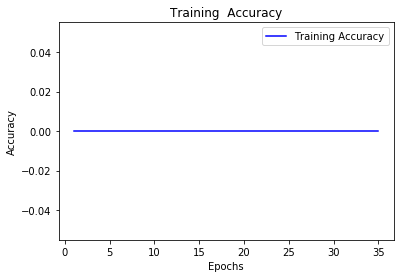

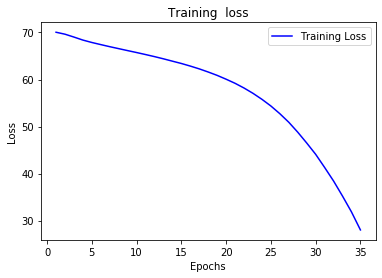

<Figure size 432x288 with 0 Axes>

In [133]:
import matplotlib.pyplot as plt

acc         = history.history['accuracy']
#val_acc     = history.history['val_acc']
loss        = history.history['loss']
#val_loss    = history.history['val_loss']

epochs      = range(1, len(acc)+ 1 )


plt.plot(epochs, acc, 'b', label = 'Training Accuracy' , )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training  Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training  loss')

plt.legend()
plt.figure()

plt.show()

In [134]:
len(loss)

35

In [135]:
x_test =  np.array([[1,1,1,1,1,1,1,10]] )

In [136]:
val = model.predict(x_test)

In [137]:
val.shape
print(val)

[[21.372986]]


In [138]:
#KEras functional api (alternative to using keras sequential() api apparently more fleexile in connecting and reusing laeyrs)
from keras.models import Model
from keras.layers import Input 
from keras.layers import Dense 
visible = Input(shape=(2,)) 
hidden1 = Dense(4)(visible)
hidden2 = Dense(3)(hidden1)
model1 = Model(inputs=visible, outputs=hidden2)

In [139]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 15        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


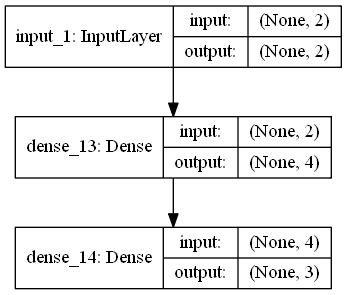

In [141]:
from keras.utils import plot_model
plot_model(model1, to_file='multilayer_perceptron_graph.png',show_shapes=True, show_layer_names=True)# error , commenting plot_model in utils--> vis doesnt work even thoug pydot and graphviz is installed

Architechting a NN

1. Number, size and type of layers 
1. Loss function, Activation functions, Optimization procedure and number of epochs. 

1. Number : Generally 5, 10 , 24
2. Size   : Generally  ?? QD
3. Type   : FF, Cnn, Rnn, LSTM, GRU   
4. Loss Fn        : [Binary] Cross Entropy, QD
5. Activations Fn : [Leaky]Relu, tanh, Sigmoid     
6. Optimizations  : Momentum, RMS Prop, Adam
7. Metrics        : 'accuracy'    , ?? QD

In [145]:
#Lets load some data
dataset = numpy.loadtxt("file name", delimiter=",")
#X = dataset[:,0:#of cols] 
#Y = dataset[:,target variableth col#] dont execute code

NameError: name 'numpy' is not defined

### Evaluation Methods 

1. Automatic Verification dataset ( validation_split=0.33 during fit)
1. Manual Verification dataset    ( Train-test split)
1. K-Fold Cross Validation

In [ ]:
# Keras variations for above methods
#Option 1 : Training Data is just X,Y , you let model.fit() split it into certain %
#Option 2 : Training Data X,Y is split into 67% for train and 33% for test using tts
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)
# Define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, y,             epochs=5, batch_size=10, validation_split=0.33) # For Option1 training data OR
#model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test,y_test),) # For Option 2, we pass the val.data explicitly and manually
# evaluate the model
scores = model.evaluate(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 


def model_dcfe:
#Define Model    
    model = Sequential()
    model.add(Dense(12, input_dim = 8, activation = 'relu'))
    model.add(Dense(8 ,                activation = 'relu'))
    model.add(Dense(1 ,                activation = 'relu'))
#Comile model  lom 
    model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
#Fit Model    
    model.fit( X[train_index], Y[train_index], epochs=150, batch_size=10, verbose=0)
#Eval model
    scores = model.evaluate(X,Y)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) cvscores.append(scores[1] * 100)
    cvscores.append(scores[1] * 100)
    
#Variations During fit Option1: 
# model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10) 
#Variations During fit Option2(tts): 
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)<br>
# model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed) 
cvscores = []

for train_index,test_index in kfold.split(X,Y): # number of train Vs test indices(instances from training sample) can be different for each loop, for one loopit may be 80-20,for another 70-30, for another 90-10
    #CDEF --> DCFE    
    #model_dcfe() #--> 10 times model will get created and compiled, as k = 10  model gets recreated in loop
    
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

## Yet another variation with Scikit Learn wrapper over Keras 
Using KerasClassifier/Regressor and cross_val_score-Dont explicitly call model.fit()

In [ ]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# Function to define model, required for KerasClassifier
def define_dc_model():
# create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 

# create model
model = KerasClassifier(build_fn=define_dc_model, epochs=150, batch_size=10, verbose=0)
# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)#--> finally calls KerasClassifier which inturn calls fit() and training happens
print(results.mean())

### How to search for the best model paramaeters to use : <font color='blue'> Grid Search <font />
    Note- Grid search is not recomened. Random search in a define search space range is recomended.

Just load some data 50 rows

In [152]:
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[0:50,0:8]
Y = dataset[0:50,8]

In [161]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Function to create model, required for SciKit Learn's KerasClassifier
def define_dc_model(optimizer, init):# like optimizer ='rmsprop', init ='glorot_uniform'dictionary from the defined below
# create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init, activation='relu'))
    model.add(Dense(8, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
# Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Actually define/create model
model = KerasClassifier(build_fn=define_dc_model, verbose=0)

# grid search epochs, batch size and optimizer and initialization methods
optimizers = ['rmsprop', 'adam']
inits = ['glorot_uniform', 'normal', 'uniform']
epochs = [50, 100, 150]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)#LHS(Keys of dict) Keras's kw importing param names used in model definition, model.fit(), model.compile(), RHS lists of values we have defined for the search space
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)#--> Actual traiing happens here, runs the model with different combinations f model parameters from the dictionary

C:\Users\cvsk7\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [159]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.620000 using {'batch_size': 10, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.480000 (0.037924) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.440000 (0.113772) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.420000 (0.079038) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'rmsprop'}
0.480000 (0.078384) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'adam'}
0.400000 (0.051450) with: {'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.440000 (0.065888) with: {'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'adam'}
0.500000 (0.137467) with: {'batch_size': 5, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.420000 (0.039258) with: {'batch_size': 5, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.540000 (0.085423) with: {'batch_size': 5, 'epochs': 100, 'init': 'normal'

### How to search for the best model paramaeters to use : <font color='blue'> Random Sampling Search <font />


### <font color='blue'> Using Keras tuner <font />

https://www.curiousily.com/posts/hackers-guide-to-hyperparameter-tuning/ 
    
code in browser  : https://colab.research.google.com/drive/1NnUdPslZubFyjek1dbzpIzi54jv0Cw0x#scrollTo=WjpiZA317zYc

https://github.com/keras-team/keras-tuner

### <font color='blue'> Using Hyperas and Hyperopt <font />
https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b

# Deep Learning for Text and Sequences ( Francios Chollet )  

#CLeaning with NLTK
1. Load the raw text                                       --->file = open(filename, 'rt') text = file.read() file.close()
1. Split into tokens                                       --->tokens = word_tokenize(text)
1. Convert to lowercase.                                   --->tokens = [w.lower() for w in tokens]
1. Remove punctuation from each token.                     --->stripped = [re_punc.sub('', w) for w in tokens] 
1. Filter out remaining tokens that are not alphabetic.    --->words = [word for word in stripped if word.isalpha()]
1. Filter out tokens that are stop words.                  --->stop_words = set(stopwords.words('english')) , words = [w for w in words if not w in stop_words
                                             

1st Step : Vectorize text = Text to Numeric tensors
1. Segment words and transform words to vectors
1. Extract n-grams for words and transform each n-gram into vectors (n-grams = overlapping groups/windows of sequenctial words)
1. Instead of words try 1,2 with characters --Andrew Ng says not so gr8
1. Words/Charachters/n-grams are called tokens.
1. So text Vecorization = Some Toeknization (word/char/ngram) and then mapping tokens to vectors
1. <b>So raw text--> Tokens --> Vectors --> Sequence Tensors --> NN</b>
1. 2 ways of makig tokens to vectors : 
    - One hot Encoding (or a variant is one-hash vectors(qd how to) done with a hashing function, less memory no need for indexing, but susceptible to has collisions . hashcollisions decrease if dimensioality of hashing space is much > total#of unique tokens)
    - Word2Vec
    

One-Hot-Encoding

In [557]:
#One-Hot ( fit_on* , *to_sequences(maps/replaces words to indices in sentences), *to_matrix(1-hots each word))
from keras.preprocessing.text import Tokenizer
sentences = ['A sham hope for an utopian equality gaurantees a distopian future',
             'Hazy and indifferent life of peace paves the path for war', 
             'Sacrifices due are only a matter of time'
             'All war is deception']
tokenizer           = Tokenizer(num_words = 90)                            #takes 90 most common words , also your 1hot dimension is 90, rank/col vector of 90 rows
word_index_build    = tokenizer.fit_on_texts(sentences)                    #just fits internally cant see anything on printing. But it internally buils word to index mapping dictionary. Toeknier.word_index is built during fit. Else Toeknier.word_index is unknown.So builds and initalizes the Tokenizer model
actual_word_indices = tokenizer.texts_to_sequences(sentences)              #each word is represented by its intiger index
one_hotted          = tokenizer.texts_to_matrix(sentences,mode = 'binary') #get 1-hot represenation

In [562]:
print(type(actual_word_indices),'\n')

print('\033[1m Actual word to idex mapping dictionary-->(tokenizer.word_index) \033[0m \n\n'     ,    tokenizer.word_index)
print(' \n')
print('\033[1m Frequency of occurence of each word-->(tokenizer.word_counts)    \033[0m \n\n'    ,    tokenizer.word_counts)
print(' \n')
total_nu_of_words   = len(sentences[0].split()) + len(sentences[1].split()) + len(sentences[2].split())
total_nu_of_indices = len(actual_word_indices[0]) + len(actual_word_indices[1]) + len(actual_word_indices[2]) 
assert total_nu_of_words == total_nu_of_indices
print('\033[1m No of words in 3 sentences: \033[0m                      %.f' %total_nu_of_words)
print('\033[1m No of of indices          : \033[0m                      %.f' %total_nu_of_indices)
print('\033[1m Shape of each one hot vector per word \033[0m          ',     one_hotted[0].shape)
print('\033[1m Actual indices of each word\033[0m \n'                  ,     actual_word_indices )
print('\033[1m No of unique words \033[0m :                             %.f' %len(tokenizer.word_counts))
print('\033[1m No of unique words \033[0m :                             %.f' %len(tokenizer.word_index))



<class 'list'> 

 Actual word to idex mapping dictionary-->(tokenizer.word_index)  

 {'a': 1, 'for': 2, 'of': 3, 'war': 4, 'sham': 5, 'hope': 6, 'an': 7, 'utopian': 8, 'equality': 9, 'gaurantees': 10, 'distopian': 11, 'future': 12, 'hazy': 13, 'and': 14, 'indifferent': 15, 'life': 16, 'peace': 17, 'paves': 18, 'the': 19, 'path': 20, 'sacrifices': 21, 'due': 22, 'are': 23, 'only': 24, 'matter': 25, 'timeall': 26, 'is': 27, 'deception': 28}
 

 Frequency of occurence of each word-->(tokenizer.word_counts)     

 OrderedDict([('a', 3), ('sham', 1), ('hope', 1), ('for', 2), ('an', 1), ('utopian', 1), ('equality', 1), ('gaurantees', 1), ('distopian', 1), ('future', 1), ('hazy', 1), ('and', 1), ('indifferent', 1), ('life', 1), ('of', 2), ('peace', 1), ('paves', 1), ('the', 1), ('path', 1), ('war', 2), ('sacrifices', 1), ('due', 1), ('are', 1), ('only', 1), ('matter', 1), ('timeall', 1), ('is', 1), ('deception', 1)])
 

 No of words in 3 sentences:                       33
 No of of indices 

In [563]:
print(len(actual_word_indices[0]))
print(one_hotted[0] )
print(one_hotted[0].shape)
print(one_hotted[1].shape)
print(one_hotted[2].shape)

11
[0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(90,)
(90,)
(90,)


In [565]:
actual_word_indices , tokenizer.word_index

([[1, 5, 6, 2, 7, 8, 9, 10, 1, 11, 12],
  [13, 14, 15, 16, 3, 17, 18, 19, 20, 2, 4],
  [21, 22, 23, 24, 1, 25, 3, 26, 4, 27, 28]],
 {'a': 1,
  'an': 7,
  'and': 14,
  'are': 23,
  'deception': 28,
  'distopian': 11,
  'due': 22,
  'equality': 9,
  'for': 2,
  'future': 12,
  'gaurantees': 10,
  'hazy': 13,
  'hope': 6,
  'indifferent': 15,
  'is': 27,
  'life': 16,
  'matter': 25,
  'of': 3,
  'only': 24,
  'path': 20,
  'paves': 18,
  'peace': 17,
  'sacrifices': 21,
  'sham': 5,
  'the': 19,
  'timeall': 26,
  'utopian': 8,
  'war': 4})

### USING PRETRAINED WORD EMBEDDINGS  : Example using GloVe on IMDB dataset

#### Load the data 

In [582]:
import os

imdb_folder = "D:\My ML Notes\Books\Jason Brown Lee\MY CODE\.ipynb_checkpoints\BclImdb\dclImdb"
train_folder = os.path.join(imdb_folder,'train')

labels = []
reviews  = []

for label_type in ['neg','pos']:
    foldername_withactual_reviews = os.path.join(train_folder,label_type)
    print(foldername_withactual_reviews)
    #print(os.listdir(folder_withactual_reviews_name))
    fnam = ' '# each individual filename
    for fnam in os.listdir(foldername_withactual_reviews):
        if fnam[-4:] == '.txt':
            abs_filename = open(os.path.join(foldername_withactual_reviews,fnam),encoding="utf8")
            reviews.append(abs_filename.read())
            abs_filename.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

D:\My ML Notes\Books\Jason Brown Lee\MY CODE\.ipynb_checkpoints\BclImdb\dclImdb\train\neg
D:\My ML Notes\Books\Jason Brown Lee\MY CODE\.ipynb_checkpoints\BclImdb\dclImdb\train\pos


In [583]:
labels.count(1),labels.count(0)

(12500, 12500)

#### Tokenize the text

In [584]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

nu_training_docs            =  200 # number of docs to be considered for training
nu_validation_docs          =  10000


top_maxwords_corpus      =  10000 # consider max vocab of 10K words in whole corpus
max_words_per_doc        =  100   # consider only 100 words per doc/review

tokenizer = Tokenizer(top_maxwords_corpus)                    # considers only top 10K words in dataset
tokenizer.fit_on_texts(reviews)                               # fit (probably just creates indices etc, basically initializes and develops Tokenizer object for this text corpus)
indices_in_words = tokenizer.texts_to_sequences(reviews)      # maps(just replaces) words with w-indices in each sentence (if run w/o fit gives error word_indices not found)

word_index_dict = tokenizer.word_index                        # dictionary with word and its index #


In [585]:
count = 0
for i in word_index_dict.items():
    if count > 1:
        break
    print(i)
    count+= 1

print('*****************')

count = 0
for i in word_index_dict.keys():
    if count > 1:
        break
    print(i)
    count+= 1 

('the', 1)
('and', 2)
*****************
the
and


In [586]:
print('Unique # of words/vocab size', len(word_index_dict), len(tokenizer.word_counts))

Unique # of words/vocab size 88582 88582


In [591]:
print(len(reviews),'/n'),
print(len(indices_in_words),'/n'),# tokenizer.texts_to_sequences(reviews)
print(len(word_index_dict),'/n'),#tokenizer.word_index 
print(len(tokenizer.word_counts),'/n'),
print(type(word_index_dict),'/n'),
print(type(tokenizer.word_counts),'/n')

25000 /n
25000 /n
88582 /n
88582 /n
<class 'dict'> /n
<class 'collections.OrderedDict'> /n


#### Important point so far

- Tokenizer() takes 1 input parameter : Top max words in complete corpus, we can define an arbitrary high number
- tokiner.fit_on_texts(training_docs)       *-----> Just fits probably calculates word indices internally
- tokiner.texts_to_sequences(training_docs) *-----> replaces each word with its index in the senences
- tokiner.word_index                        *-----> Gives a dictionry with words and their corresponding indices assigned
- tokenizer.word_counts                     *-----> Gives a dictionry with words and their frequency of occurance
- tokenizer.texts_to_matrix(text,mode = 'binary')*-----> Gives 1-hot representation


*****************************



  
  
 
  

Some other ways of using Keras -- Side Note Begin

In [625]:

from keras.preprocessing.text import one_hot 
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence
text = 'The quick brown fox jumped over the lazy dog.'
words = set(text_to_word_sequence(text)) # just gives words, just vocabulary.

vocab_size = len(words)

intiger_encoded_hash = one_hot(text,round(len(words)*1.3))# not one hot encoding just a wrapper around hash.
#or more flexible has option with hashin_trick , we acn specify which hashfunction like md5
hastrick_result = hashing_trick(text, round(vocab_size*1.3), hash_function='md5')
len(words),words,one_hotted,hastrick_result

In [626]:
len(words),words,one_hotted,hastrick_result

(8,
 {'brown', 'dog', 'fox', 'jumped', 'lazy', 'over', 'quick', 'the'},
 [7, 9, 2, 8, 2, 3, 7, 6, 5],
 [6, 4, 1, 2, 7, 5, 6, 2, 6])

Some other ways of using Keras -- Side Note End

In [620]:
padded_wordindices = pad_sequences(indices_in_words,max_words_per_doc) #pads where less , trims where more to max_words_per_doc(100)

In [602]:
len(indices_in_words[3]),len(indices_in_words[73])

(151, 139)

In [594]:
padded_wordindices.shape

(25000, 100)

In [601]:
len(padded_wordindices[3]),len(padded_wordindices[73]),

(100, 100)

In [82]:
import itertools

#for i, j in itertools.product(range(len(indices_in_words)), range(len(padded_wordindices))):# dont run this loop again 25000 
    #print(len(indices_in_words[i]),len(padded_wordindices[j]))
n = [11,12,13,14,15,16,17]                              
for i,j in itertools.product(range(10),enumerate(n):  
        print(i,j)


SyntaxError: invalid syntax (<ipython-input-82-32292b751aac>, line 6)

In [17]:
labels = np.asarray(labels)
type(labels)#numpy.ndarray
padded_wordindices.shape, labels.shape#((25000, 100), (25000,))

((25000, 100), (25000,))

In [18]:
row_indices = np.arange(padded_wordindices.shape[0])# just row numbers , array([    0,     1,     2, ..., 24997, 24998, 24999])

In [19]:
np.random.shuffle(row_indices) #shuffles row indices array([ 9405, 18300, 12523, ..., 21803, 22389, 19188])

In [20]:
padded_wordindices = padded_wordindices[row_indices] # shuffled 
labels             = labels[row_indices]

In [46]:
X_train = padded_wordindices[:nu_training_docs]
y_train = labels[:nu_training_docs]
X_val   = padded_wordindices[nu_training_docs:nu_training_docs+nu_validation_docs]
y_val   = labels[nu_training_docs:nu_training_docs+nu_validation_docs]


In [45]:
l = [[1,1,1],[2,2,2],[3,3,3],[4,4,4],[5,5,5],[6,6,6],[7,7,7],[8,8,8],[9,9,9],[10,10,10],[11,11,11],]
a = np.asarray(l)
type(a)
a1 = a[:3]
b = a[3:]
print(a1,b)

[[1 1 1]
 [2 2 2]
 [3 3 3]] [[ 4  4  4]
 [ 5  5  5]
 [ 6  6  6]
 [ 7  7  7]
 [ 8  8  8]
 [ 9  9  9]
 [10 10 10]
 [11 11 11]]


#### Time to  "GloVe" up

In [156]:
glove_dir = 'D:\My ML Notes\Books\Jason Brown Lee\MY CODE\glove.6Bf'

actual_glove_file = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding="utf8") # open the glove file for readinf
print(actual_glove_file)
count = 0

#just to see how the contents of GloVe file look, see first 2 lines. The words "the" and "," are shown with their embeding vectors
for line  in  actual_glove_file :
    values = line.split() # each line has format --> word floating point numbers
    if count < 1: # print only first line
        print(type(line))
        print(line)
        print(type(values))
        print(values)
    else:
        break 
    count+=1
    
#Ok lets 
embeddings_index = {}
for line in actual_glove_file :
    values = line.split() # line is a string and values is a list
    word   = values[0]
    coefs  = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
# So now we have a dictionary called embeddings_index with the actual english word and its glove Coefs
    
actual_glove_file.close()   #close 

print('# of word vectors found %s' %len(embeddings_index)) # # of word vectors found 399998 , 2less than 4lac,400K


 

<_io.TextIOWrapper name='D:\\My ML Notes\\Books\\Jason Brown Lee\\MY CODE\\glove.6Bf\\glove.6B.100d.txt' mode='r' encoding='utf8'>
<class 'str'>
the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 

In [205]:

type(embeddings_index.get("amaneunesis"))#numpy.ndarray

print("\n actual embedding vector of the english word amaneunesis is \n"  )
print(embeddings_index.get("amaneunesis"))

print("\n actual embedding vector of the english word *of* is .%a\n"  )
print(embeddings_index.get("of"))#check 2nd line of embeddings_index printed below and compare the coefs.
    

print("\n***********1st two lines of embeddings_index dictionary**********")

count = 0
for k, v in embeddings_index.items():
    print('\n',k, v)    # englis word(k) , ceofs(v)
    if count > 0:
        break
    count+=1

#same as above
print("\n***********1st two lines of embeddings_index dictionary**********")
count = 0
for i in  embeddings_index:
    print('\n',i,embeddings_index[i]) # englis word , ceofs
    if count > 0:
        break
    count+=1    




 actual embedding vector of the english word amaneunesis is .%a

None

 actual embedding vector of the english word *of* is .%a

[-0.1529     -0.24279     0.89837003  0.16996001  0.53516001  0.48784
 -0.58825999 -0.17982    -1.35810006  0.42541     0.15377     0.24214999
  0.13474     0.41192999  0.67043    -0.56418002  0.42985001 -0.012183
 -0.11677     0.31781     0.054177   -0.054273    0.35516    -0.30241001
  0.31434    -0.33846     0.71714997 -0.26855001 -0.15837    -0.47466999
  0.051581   -0.33252001  0.15003    -0.12989999 -0.54617    -0.37843001
  0.64261001  0.82187003 -0.080006    0.078479   -0.96976    -0.57740998
  0.56490999 -0.39873001 -0.057099    0.19743     0.065706   -0.48091999
 -0.20125    -0.40834001  0.39456001 -0.02642    -0.11838     1.01199996
 -0.53171003 -2.74740005 -0.042981   -0.74848998  1.75740004  0.59085
  0.04885     0.78267002  0.38497001  0.42096999  0.67882001  0.10337
  0.63279998 -0.026595    0.58647001 -0.44332001  0.33057001 -0.12022
 -0.5564

In [572]:
dict = {}
dict['sai'] = 1
dict['srav'] = 5

In [581]:
dict.get('srav'),dict['sai']

(5, 1)

In [579]:
for key,val in dict.items():
    print(key,val)
    

sai 1
srav 5


In [148]:
print(embeddings_index.items())

dict_items([])


In [237]:
embedding_dim = 100 # why --> 100 dimension glove 6b file     

embedding_matrix = np.zeros((top_maxwords_corpus,embedding_dim))   # notice np.zeroes(inner tuple bracket), #type array
                                                                 # notice also the embedding matirx shape is max words and embeding dim(100)
                                                                 # Where as if we were using an embedding layer with an ML task then input shape would be a 3d tensor of shape (samples,sequence length per sample,desired emedding dimesion of embedding vector itself)        

for word,its_index in word_index_dict.items():              #word_index_dict is a dict of words and their assigned indices by the tokenizer on the original corpus
    if its_index < top_maxwords_corpus:                     #only considering 1st 10K words
        embedding_vector = embeddings_index.get(word)       #gives the coefs of each word ( floaiting points are value pair of key the word)
        if embedding_vector is not None:                    #if word from corpus is also found in glove file
            embedding_matrix[its_index] = embedding_vector  #then add glove coeffs of that word into emeddings_matrix array
                                                            #if word from corpus is not found in Glove file it will have just have the initialized values(zeros) in embedding matirx

In [239]:
embedding_matrix.shape
embedding_matrix[0:3,0:3]
len(np.all(embedding_matrix == 0 , axis = 1))#100

10000

In [242]:
# We have the embedding matrix(with coefs from Glove) for all the words in out complex, so uild the model dcef

from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense

model = Sequential()ii
model.add(Embedding(top_maxwords_corpus, embedding_dim, input_length = max_words_per_doc ))
model.add(Flatten())
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [270]:
import sys
print(sys.version)

3.6.7 |Anaconda 4.4.0 (64-bit)| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]


In [244]:
# Freeze the Embedding model using GloVe 
model.layers[0].set_weights([embedding_matrix]) # make the coefs mapped from the glove file the weights of 1st layer (this is now a pretrained layer)
model.layers[0].trainable = False               # Freeze and dont train => dont adjust the glove weights you painstakenly downladed and mapped to your corpus

In [250]:
#Now that we finally defined the model ( define + freeze non trainable 1st embedding layer)

#compile , fit , evaluate
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(X_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (X_val,y_val))

model.save_weights('model_usingGloVe vectors.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 23s - loss: 1.4888 - acc: 0.4800 - val_loss: 0.6908 - val_acc: 0.5273
Epoch 2/10
200/200 [==============================] - 1s - loss: 0.5389 - acc: 0.7800 - val_loss: 0.9754 - val_acc: 0.5006
Epoch 3/10
200/200 [==============================] - 1s - loss: 0.4223 - acc: 0.8050 - val_loss: 0.8263 - val_acc: 0.5172
Epoch 4/10
200/200 [==============================] - 1s - loss: 0.2851 - acc: 0.9100 - val_loss: 0.7490 - val_acc: 0.5508
Epoch 5/10
200/200 [==============================] - 1s - loss: 0.1751 - acc: 0.9850 - val_loss: 1.0901 - val_acc: 0.5036
Epoch 6/10
200/200 [==============================] - 1s - loss: 0.1296 - acc: 0.9850 - val_loss: 1.0440 - val_acc: 0.5080
Epoch 7/10
200/200 [==============================] - 1s - loss: 0.1324 - acc: 0.9750 - val_loss: 0.9313 - val_acc: 0.5196
Epoch 8/10
200/200 [==============================] - 1s - loss: 0.0568 - acc: 1.0000 - va

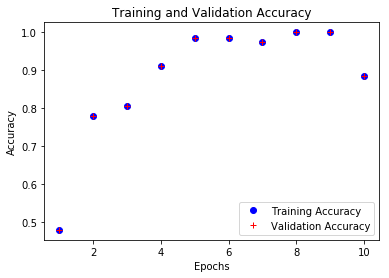

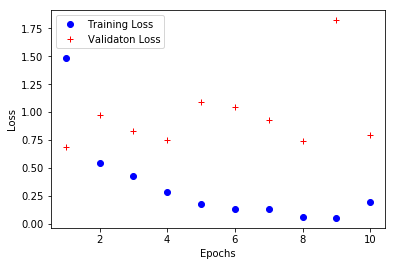

In [266]:
import matplotlib.pyplot as plt

acc         = history.history['acc']
val_acc     = history.history['val_acc']
loss        = history.history['loss']
val_loss    = history.history['val_loss']

epochs      = range(1, len(acc)+ 1 )


plt.plot(epochs, acc, 'bo', label = 'Training Accuracy' , )
plt.plot(epochs, acc, 'r+', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.legend()
plt.figure()

plt.plot(epochs, loss,     'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r+', label = 'Validaton Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.figure()

plt.show()

### Embedding Layer along with an ML task

- Embedding layer takes input of 3 ip params : (smaples, sequence length for each sample, diminesion of the embedding vector itself)
- Output of embedding is of shape 3D tensor  : (smaples, sequence length for each sample, diminesion of the embedding vector itself)

## Word Embeddings (dense vectors)

- You shall know a word by the company it keeps
- Learned representaion for text, where words that have same meaning have a similar representation
- Dense and lower dimensional, floatin point vectors, so good for computation (NNs not so good with sparse high dimensional data)
- Dense representations generalize well : Why ? - similar features (words) have similar representations
- Each word is mapped to and represented by one vector of 10s/100s of dimensions vs 1000s/millions of dimensions needed for 1-hot encoded reps    
- The word vector/feature vector represents different aspects of the word
- The number of features per word is much smaller than the vocablary size itself.(10s/100s). In BoW dims = # of words.
- Each word is mapped randomly to a predefined vector in a predefined vector space and the real values are learned.
- In bagof words(bad-of-n-grams) model different words have different representation regardless of their similarity and recurance in similar contexts.
- Bagof words needs to have n-grams first, not deep learning methods. Bow are usefull and mandatory with shallow models like Logistic reression, RFs etc
- Common to see word embeddings with 256,512,1024 when dealing with large vocabs, 1-hot runs into 20K dims.
- BoW doesnt really preserve any order of words
- NNs dont need n-grams since they learn heirarchichcal features


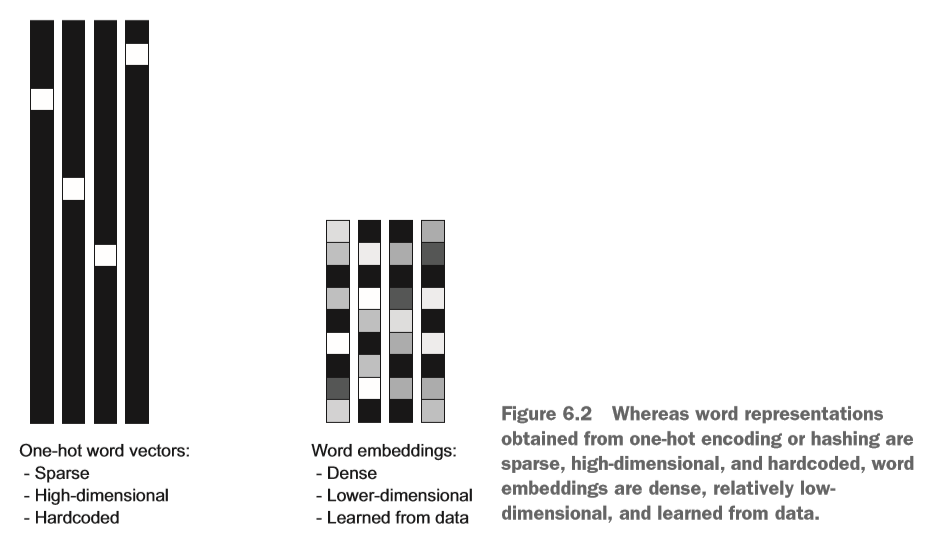

In [603]:
from IPython.display import Image
Image("Ohes Vs Word Embedding vectors.png")

### 2 ways to learn word embeddings

1. Learn embeddings jointly along with a main task viz. doc classification, sentiment prediction etc. Using an emedding layer
2. Using pre-trained word embeddings

1. Learning Jointly with Embedding as 1st layer

The embedding layer at the begginig looks like below

model.add(Embedding(max_words_being_considered_in vocab ,  dims_of_embedding_space, max_#ofwords_perdoc/sentence ))

### 3 Algorithims for Word Embeddings

1. Embedding layer (jointly with some NLP supervised task)
1. Word 2 Vec : Cbow - Learns by Predicts current wordd based on context SkipGram- Leanrs by Predicts surrounding words given a current word.
   1. Both learn from local usage context , context = window of neighbouring words
   1. Smaller windows produce more functional and synctatic capabilities
1. GloVe   : marries matrix factorization methods like LSA + Word2Vec
   1. Out performs Word2Vec models in word analogy, word simmilarty and NER tasks
   1. GloVe constructs an explicit word-context(instead of a window) or word co-occurrence matrix using statistics across the whole text corpus
   

## BASIC STRUCTURE of different Deep Learning Models

1. Basic ANN - 2 Keras Types and 1 TF Type. Regression and Classification
2. RNN       - 1 Keras Type  and 1 TF Type.
3. CNN       - 1 Keras Type  and 1 TF Type.

1st Basic NLP FLow with sklearn and Nltk

In [627]:
# Tokenize to/as words (words = text.split() #TOeknize)
#Or with NLTK (tokens = word_tokenize(text) print(tokens[:100]))
from nltk.tokenize import word_tokenize 
# load data    
filename = 'NLP Text FIle.txt'
file = open(filename, 'rt') 
text = file.read() 
file.close() 
# split into words 
tokens = word_tokenize(text) 
print(tokens[:100])


['Just', 'like', 'that', 'she', 'went', 'and', 'bought', 'an', 'appartment']


In [628]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english') 
print(stop_words)
type(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

list

In [631]:
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
# load data ------------------------------
#1.Load , 2.remove punctuations, 3.turn to lower case 4.TOeknize 5.Stop wor 6.Stem 7.Vectorize(CV,TfiDF,Embedding(W2V,Emlayer))
#8.TfIdf
filename = 'NLP Text FIle.txt'

file = open(filename, 'rt') 
text = file.read() 
file.close() 
# split into words 
tokens = word_tokenize(text) 
# stemming of words 
porter = PorterStemmer() 
stemmed = [porter.stem(word) for word in tokens] 
print(stemmed[:100])

['just', 'like', 'that', 'she', 'went', 'and', 'bought', 'an', 'appart']


In [637]:
from sklearn.feature_extraction.text import CountVectorizer 
# list of text documents text = ["The quick brown fox jumped over the lazy dog."] 
# create the transform 
vectorizer = CountVectorizer() 
# tokenize and build vocab 
vectorizer.fit(stemmed) 
# summarize 
print(vectorizer.vocabulary_) 
# encode document 
vector = vectorizer.transform(stemmed) 
# summarize encoded vector 
print(vector.shape) 
print(type(vector)) 
print(vector.toarray())

{'just': 4, 'like': 5, 'that': 7, 'she': 6, 'went': 8, 'and': 1, 'bought': 3, 'an': 0, 'appart': 2}
(9, 9)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]]


In [638]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents 
text = ["The quick brown fox jumped over the lazy dog.", "The dog.", "The fox"] 
# create the transform 
vectorizer = TfidfVectorizer() 
# tokenize and build vocab 
vectorizer.fit(text) 
# summarize 
print(vectorizer.vocabulary_) 
print(vectorizer.idf_) 
# encode document 
vector = vectorizer.transform([text[0]])
# summarize encoded vector 
print(vector.shape) 
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


C:\Users\sai_chedemala\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [639]:
from sklearn.feature_extraction.text import HashingVectorizer #QD what does hashing really do ?
# list of text documents text = ["The quick brown fox jumped over the lazy dog."] 
# create the transform 
vectorizer = HashingVectorizer(n_features=20) 
# encode document 
vector = vectorizer.transform(text) 
# summarize encoded vector 
print(vector.shape) 
print(vector.toarray())

(3, 20)
[[ 0.          0.          0.          0.          0.          0.33333333
   0.         -0.33333333  0.33333333  0.          0.          0.33333333
   0.          0.          0.         -0.33333333  0.          0.
  -0.66666667  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.         -0.70710678  0.          0.          0.          0.
  -0.70710678  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.         -0.70710678  0.          0.
  -0.70710678  0.        ]]


Using Keras - basic vectrization of text

In [640]:

from keras.preprocessing.text import one_hot 
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence
text = 'The quick brown fox jumped over the lazy dog.'
words = set(text_to_word_sequence(text)) # just gives words, just vocabulary.

vocab_size = len(words)

intiger_encoded_hash = one_hot(text,round(len(words)*1.3))# not one hot encoding just a wrapper around hash.
#or more flexible has option with hashin_trick , we acn specify which hashfunction like md5
hastrick_result = hashing_trick(text, round(vocab_size*1.3), hash_function='md5')
len(words),words,one_hotted,hastrick_result

(8,
 {'brown', 'dog', 'fox', 'jumped', 'lazy', 'over', 'quick', 'the'},
 [7, 9, 2, 8, 2, 3, 7, 6, 5],
 [6, 4, 1, 2, 7, 5, 6, 2, 6])

Tokenizer API in Keras

In [657]:
from keras.preprocessing.text import Tokenizer 
# define 5 documents 
docs = ['Well done and good work well done!', 'Good work', 'Great effort', 'nice work', 'Excellent!'] 
# create the tokenizer 
t = Tokenizer() 
# fit the tokenizer on the documents 
t.fit_on_texts(docs)
# summarize what was learned 
print(t.word_counts) #frequency of words/tokens
print(t.document_count) #total number of docs
print(t.word_index) #Dictionary of words + indices assigned
print(t.word_docs)  #Dictionary of words + number of docs they figure in

OrderedDict([('well', 2), ('done', 2), ('and', 1), ('good', 2), ('work', 3), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'and': 5, 'great': 6, 'effort': 7, 'nice': 8, 'excellent': 9}
{'done': 1, 'good': 2, 'and': 1, 'well': 1, 'work': 3, 'great': 1, 'effort': 1, 'nice': 1, 'excellent': 1}


In [658]:
# integer encode documents --Std BOW encoding like 1-hot(inary), count vectorizer, tfidf , freq
encoded_docs = t.texts_to_matrix(docs, mode='count') 
print(encoded_docs)
print(encoded_docs.shape)

[[0. 1. 2. 2. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(5, 10)


In [659]:
encoded_docs = t.texts_to_matrix(docs, mode='binary') 
print(encoded_docs)#notice difference in 1st row.Count gives #of times a word occurs per doc. Binary is just one-hot encoding it.
print(encoded_docs.shape)

[[0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(5, 10)


- Term Frequency : is a scoring of the frequency of the word in the current document.
- Inverse Document Frequency: is a scoring of how rare the word is across documents.


In [668]:
encoded_docs = t.texts_to_matrix(docs, mode='tfidf') 
print(encoded_docs)
print(encoded_docs.shape)

[[0.         0.81093022 2.12111209 2.12111209 0.98082925 1.25276297
  0.         0.         0.         0.        ]
 [0.         0.81093022 0.         0.         0.98082925 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.25276297 1.25276297 0.         0.        ]
 [0.         0.81093022 0.         0.         0.         0.
  0.         0.         1.25276297 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.25276297]]
(5, 10)


In [669]:
encoded_docs = t.texts_to_matrix(docs, mode='freq') #The frequency of each word as a ratio of number of words within each document.
#Not same as mode=count
print(encoded_docs)
print(encoded_docs.shape)# note 2/7 = .28571 i.e words 'well' and 'done'occure twice and total of 7 words in the 1st doc.

[[0.         0.14285714 0.28571429 0.28571429 0.14285714 0.14285714
  0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.5        0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.5        0.5        0.         0.        ]
 [0.         0.5        0.         0.         0.         0.
  0.         0.         0.5        0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.        ]]
(5, 10)
